<a href="https://colab.research.google.com/github/Kenzi-GIT/PCD_Assignment02/blob/main/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kenji Ratanaputra - 24/534421/PA/22664
Perform an implementation for image enhancement in any image types below:
*   Blurred Image
*   Dark Image
*   Bright Image
*   Low-contrast image




Melakukan import pada library dan file yang diperlukan untuk tugas berikut


In [35]:
!rm -rf PCD_Assignment02
!git clone https://github.com/Kenzi-GIT/PCD_Assignment02

Cloning into 'PCD_Assignment02'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 10.89 MiB | 19.16 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [36]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage import exposure, filters, io

blur = "/content/PCD_Assignment02/Blur.jpg"
dark = "/content/PCD_Assignment02/dark.jpg"
low = "/content/PCD_Assignment02/low_contrast.jpg"
bright = "/content/PCD_Assignment02/bright.webp"

blur_img = cv2.imread(blur)
blur_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB)

dark_img = cv2.imread(dark)
dark_img = cv2.cvtColor(dark_img, cv2.COLOR_BGR2RGB)

low_img = cv2.imread(low)
low_img = cv2.cvtColor(low_img, cv2.COLOR_BGR2RGB)

bright_img = cv2.imread(bright)
bright_img = cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB)

# Function Show

In [37]:
def show(img1,img2):
  plt.figure(figsize=(10,10))

  #Before
  plt.subplot(1,2,1)
  plt.imshow(img1)
  plt.title("Before")
  plt.axis("off")

  #After
  plt.subplot(1,2,2)
  plt.imshow(img2)
  plt.title("After")
  plt.axis("off")

  plt.show()

# Analisis Pendekatan Citra Buram / Blur
Untuk bagian ini, kita akan melakukan metode image enchancement pada citra yang blur. Hal ini dapat disebabkan oleh beberapa faktor seperti manual focus yang tidak tepat, ketidakstabilan pengambilan yang menyebabkan kualitas citra menjadi kabur. Untuk memperbaiki hal tersebut saya akan mencoba 2 pendekatan:
*   Unsharp Filter :  bekerja dengan cara mengurangi citra blur dari citra asli, kemudian memperkuat detail dengan menambahkan kembali informasi tepi yang hilang. Teknik ini efektif untuk meningkatkan ketajaman citra yang kabur akibat fokus tidak tepat. Dengan parameter penguatan (*k*), hasil akhir dapat diatur sesuai tingkat ketajaman yang diinginkan.
*   High Pass Filter : menggunakan kernel Laplacian untuk menonjolkan tepi dan detail berfrekuensi tinggi pada citra. Proses ini menghasilkan citra yang lebih tajam dengan menambahkan komponen tepi ke dalam citra asli. Pendekatan ini cocok untuk memperbaiki blur ringan hingga sedang, namun perlu hati-hati karena dapat memperkuat noise.



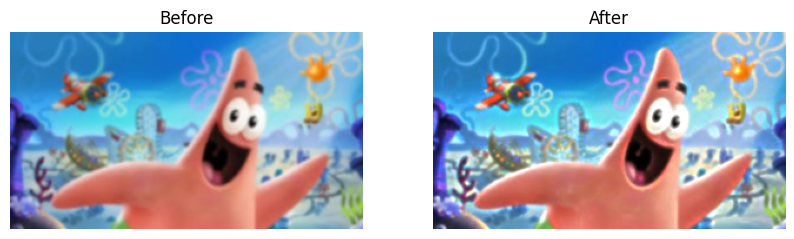

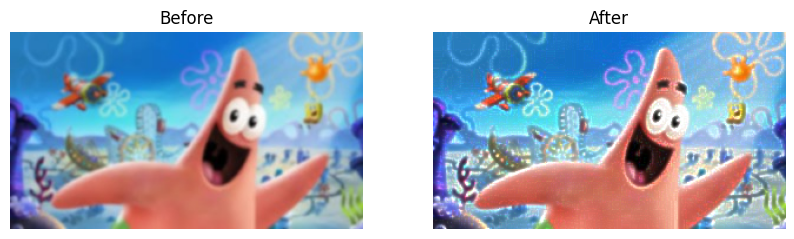

In [38]:
def unsharp(img, k):
    blur_img = cv2.GaussianBlur(img, (0, 0), 3)
    mask_img = cv2.subtract(img, blur_img)
    sharp_img = cv2.addWeighted(img, 1.0, mask_img, k, 0)

    return np.clip(sharp_img, 0, 255).astype(np.uint8)

show(blur_img,unsharp(blur_img, 1.5))

def highpass(img):
  lap_kernel = np.array(
                    [[-1, -1, -1],
                     [-1,  8, -1],
                     [-1, -1, -1]], dtype=np.float32)
  lap = cv2.filter2D(img, -1, lap_kernel)
  sharpened = img.astype(np.float32) + lap

  return np.clip(sharpened, 0, 255).astype(np.uint8)
show(blur_img,highpass(blur_img))

Dari before after kedua gambar, setelah dilakukan upaya enchancement citra blur. Jika diperhatikan pada pesawat merah disebelah kiri mendapatkan peningkatan secara kejelasan. Artinya dari kedua pendekatan ini berhasil mengatasi gambar yang blur. Untuk kualitas juga dapat ditingkatkan hal ini berlaku untuk Unsharp Filter dengan menaikkan nilai K

# Analisis Pendekatan Citra Gelap atau Terang
Untuk bagian ini, kita akan melakukan metode image enhancement pada citra yang gelap/terang. Kondisi ini dapat terjadi karena pencahayaan yang tidak merata saat pengambilan gambar atau bukaan lensa yang kurang besar sehingga detail objek sulit terlihat. Untuk memperbaiki hal tersebut saya akan mencoba 3 pendekatan:
* Negative Transformation : Transformasi negatif bekerja dengan cara membalikkan nilai intensitas piksel, sehingga area gelap menjadi terang dan sebaliknya. Metode ini bermanfaat untuk menonjolkan detail pada citra gelap dengan distribusi kontras yang tidak merata.
* Log Transformation : Metode logaritmik memperkuat nilai intensitas rendah dan menekan intensitas tinggi pada citra. Transformasi ini cocok untuk citra gelap karena mampu menonjolkan detail pada area dengan pencahayaan rendah.
* Gamma Correction : Koreksi gamma mengatur kecerahan citra berdasarkan fungsi eksponensial dengan parameter gamma. Dengan gamma < 1, citra gelap akan menjadi lebih terang sehingga detail tersembunyi dapat terlihat jelas. Teknik ini banyak digunakan dalam praproses citra untuk menyesuaikan persepsi visual.


# Dark Image

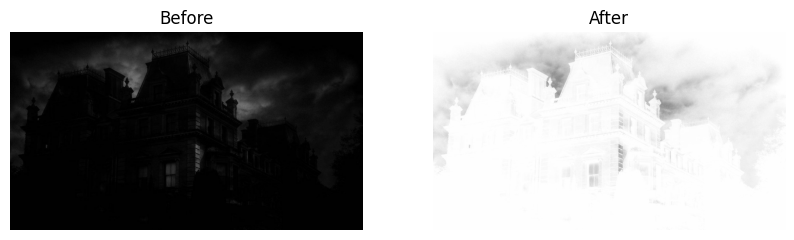

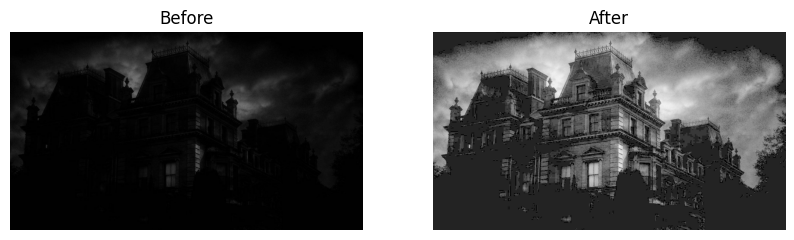

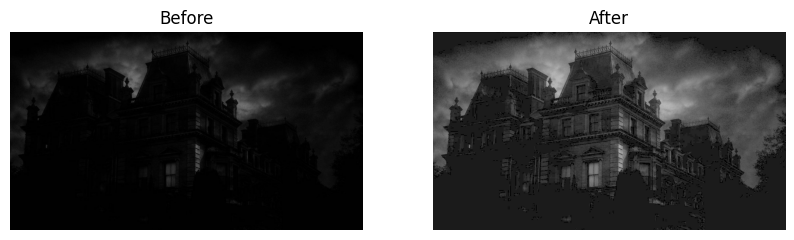

In [39]:
def negative(img):
  return 255-img

show(dark_img,negative(dark_img))

def log_trans(img):
  img_float = img.astype(np.float32)
  c = 255 / np.log(1 + np.max(img_float))
  log_transformed = c * (np.log(1 + img_float))
  log_transformed = np.array(log_transformed, dtype=np.uint8)

  return log_transformed

show(dark_img,log_trans(dark_img))

def gamma(img, gamma=0.4):
  out = img.astype(float)
  normalized = out / 255.0
  for i in range(normalized.shape[0]):
    for j in range(normalized.shape[1]):
      for k in range(normalized.shape[2]):
        normalized[i][j][k] = normalized[i][j][k] ** gamma

  out = normalized * 255.0
  return out.astype(np.uint8)

show(dark_img,gamma(dark_img))



* Dari metode Negative, gambar telah berhasil berubah menjadi lebih terang. Hal ini sesuai dengan cara kerja metode negative itu sendiri
* Untuk metode Log Transform dan Gamma, Kedua citra yang pada bangunan yang sebelumnya tidak terlihat. Setelah dilakukan operasi berhasil menjadi terlihat lebih jelas. Namun pada Log Transform dinding terlihat lebih terang dibandingkan metode Gamma

# Bright Image

Pada citra terang atau overexposure seperti berikut, tidak dapat menggunakan log transformation. Hal ini karena fungsi logaritma akan memberikan peningkatan lebih besar pada nilai intensitas rendah dibandingkan pada nilai tinggi

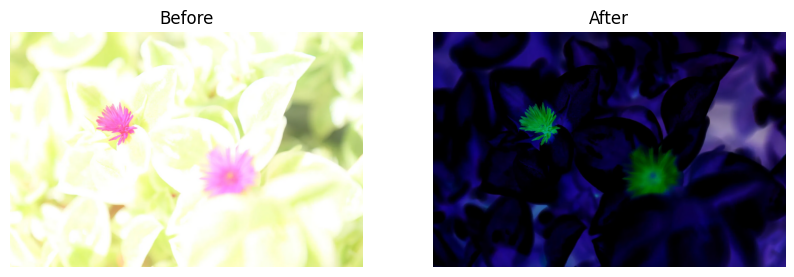

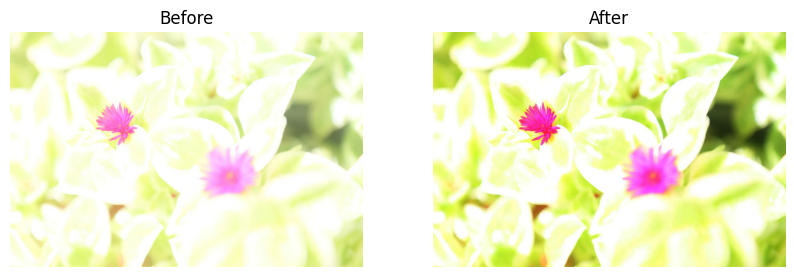

In [40]:
def negative(img):
  return 255-img

show(bright_img,negative(bright_img))

# def log_trans(img):
#   img_float = img.astype(np.float32)
#   c = 255 / np.log(1 + np.max(img_float))
#   log_transformed = c * (np.log(1 + img_float))
#   log_transformed = np.array(log_transformed, dtype=np.uint8)

#   return log_transformed

# show(bright_img,log_trans(bright_img))

def gamma(img, gamma=2.4):
  out = img.astype(float)
  normalized = out / 255.0
  for i in range(normalized.shape[0]):
      for j in range(normalized.shape[1]):
        for k in range(normalized.shape[2]):
          normalized[i][j][k] = normalized[i][j][k] ** gamma
  out = normalized * 255.0
  return out.astype(np.uint8)

show(bright_img,gamma(bright_img))



* Melihat hasil dari metode Negative, gambar yang sebelumnya over exposure menjadi lebih gelap
* Kemudian dengan metode Gamma, dengan memasukkan Y > 1 maka gambar akan berubah menjadi lebih gelap. Dapat dilihat dari bunga warnanya cenderung putih menjadi lebih merah muda (pink)

# Analisis Pendekatan Citra Low Contrast
Untuk bagian ini, kita akan melakukan metode image enhancement pada citra dengan kontras rendah. Kondisi ini umumnya disebabkan oleh distribusi intensitas piksel yang sempit, sehingga citra terlihat datar dan kurang detail. Untuk memperbaiki hal tersebut saya akan mencoba 3 pendekatan:
* Contrast Stretching
Contrast stretching memperluas rentang intensitas piksel dari skala sempit ke skala penuh (0–255). Dengan cara ini, kontras citra meningkat dan detail yang sebelumnya samar menjadi lebih jelas.
* Histogram Equalization
Histogram equalization mendistribusikan intensitas piksel agar lebih merata menggunakan fungsi distribusi kumulatif. Teknik ini efektif untuk meningkatkan kontras global, terutama pada citra dengan pencahayaan yang tidak merata.
* Gray Level Slicing
Gray level slicing menyoroti rentang intensitas tertentu sehingga objek dengan keabuan spesifik lebih terlihat. Pendekatan ini berguna untuk menekankan area penting, misalnya mendeteksi pola atau objek tertentu dalam citra.


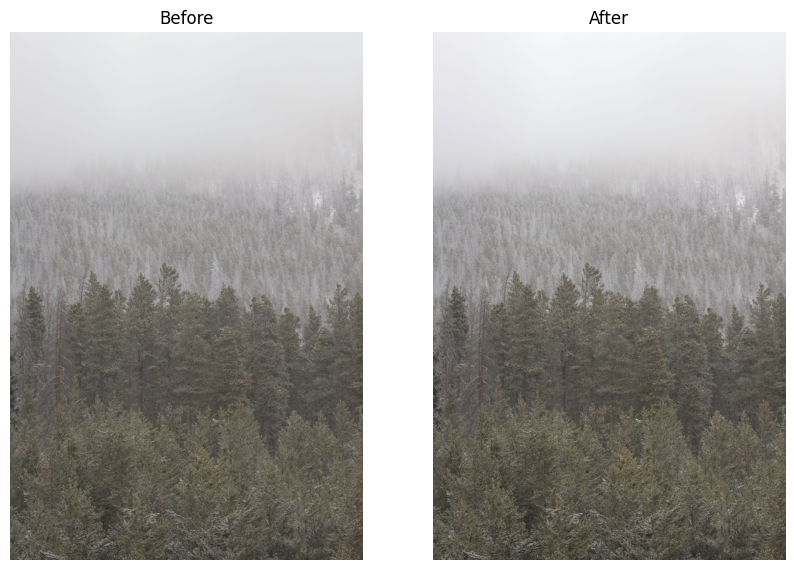

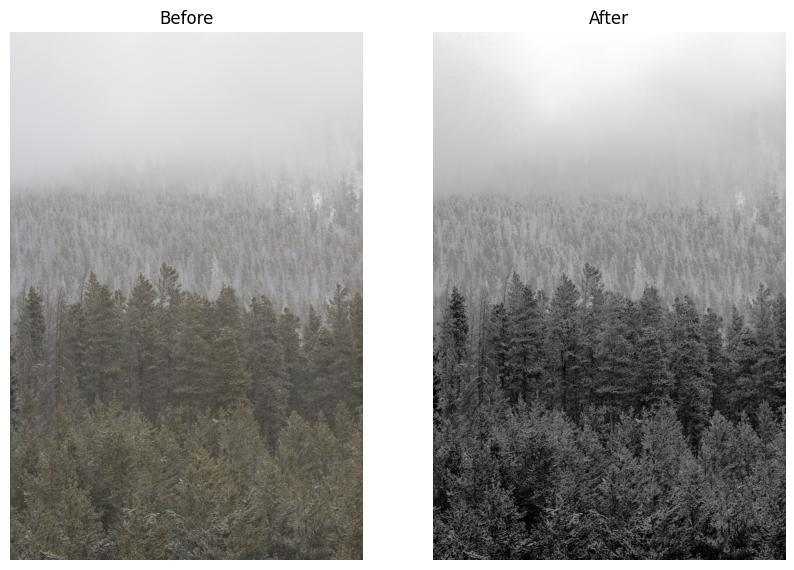

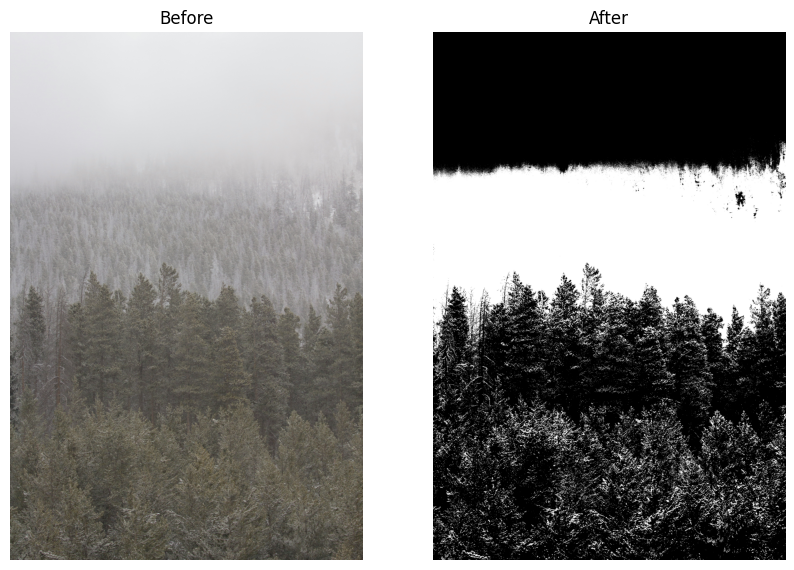

In [41]:
def stretch(img):
    out = img.astype(float)
    max_val, min_val = np.max(out), np.min(out)
    a, b = 0, 255
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i][j] = (b - a) * (out[i][j] - min_val) / (max_val - min_val) + a

    return out.astype(np.uint8)

show(low_img,stretch(low_img))

def hist(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    L = 256
    hist = np.zeros(L)
    for i in range(gray_img.shape[0]):
        for j in range(gray_img.shape[1]):
            hist[int(gray_img[i,j])] += 1

    total_pixels = gray_img.shape[0] * gray_img.shape[1]
    pdf = hist / total_pixels

    cdf = np.zeros(L)
    cdf[0] = pdf[0]
    for i in range(1, L):
        cdf[i] = cdf[i - 1] + pdf[i]

    cdf = (cdf * (L - 1)).astype(np.uint8)

    out = np.zeros(gray_img.shape, dtype=np.uint8)
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i,j] = cdf[gray_img[i,j]]

    out_rgb = cv2.cvtColor(out, cv2.COLOR_GRAY2RGB)
    return out_rgb

show(low_img, hist(low_img))

def grey(img, low, high):
  gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  out = np.zeros_like(gray_img, dtype=np.uint8)
  for i in range(out.shape[0]):
    for j in range(out.shape[1]):
      if (low <= gray_img[i, j] <= high):
        out[i, j] = 255
      else:
        out[i, j] = 0
  return cv2.cvtColor(out, cv2.COLOR_GRAY2RGB)

show(low_img, grey(low_img, 110, 200))

* Pada metode Contrast Stretching, dapat dilihat pada bagian kabut dari pepohonan ada lebih banyak detail gelap. Hal ini menandakan bahwa contrast pada citra telah berhasil ditingkatkan
* Pada metode Histogram juga, gambar yang dihasilkan menjadi paling meningkat dibandingkan 2 metode lain. Hanya saja dari warna gambar menjadi menghilang.
* Untuk metode Grey Slicing, citra gambar yang contrast atau spesifik dapat diperlihatkan dengan jelas. Dapat dilihat pada citra gelap